In [1]:
import tensorflow as tf

## Let's Get Our helper functions

In [2]:
# Download file of helper function
!wget https://raw.githubusercontent.com/es-OmarHani/tensorflow-deep-learning/main/extras/helper_functions.py

# IMport our functions
from helper_functions import unzip_data, plot_loss_curves, make_confusion_matrix, create_tensorboard_callback, compare_historys, walk_through_dir

--2023-09-17 17:44:57--  https://raw.githubusercontent.com/es-OmarHani/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-17 17:44:58 (85.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Download Our Data


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

# Let's unzip data
unzip_data('101_food_classes_10_percent.zip')

--2023-09-17 17:44:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   151MB/s    in 13s     

2023-09-17 17:45:12 (120 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



## Load and preprocessing our data

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# dir of our data
train_dir = '101_food_classes_10_percent/train/'
test_dir = '101_food_classes_10_percent/test/'

IMG_SIZE = (224, 224)

# Load our data
train_data_10_percent_101_classes = image_dataset_from_directory(train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = 'categorical')

test_data = image_dataset_from_directory(test_dir,
                                        image_size = IMG_SIZE,
                                        label_mode = 'categorical',
                                        shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Download Our pretrained model

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

# Unzip data
unzip_data('06_101_food_class_10_percent_saved_big_dog_model.zip')

--2023-09-17 17:45:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M   115MB/s    in 0.4s    

2023-09-17 17:45:50 (115 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



## Load Our pretrained model

In [6]:
# Load model
model = tf.keras.models.load_model('06_101_food_class_10_percent_saved_big_dog_model')

# Evaluate On our model
res_pretrained_model = model.evaluate(test_data)

790/790 [==============================] - 89s 101ms/step - loss: 1.8027 - accuracy: 0.6078


In [7]:
# Checl on our model
model.summary()

Model: "functional_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_9  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 101)               129381    
                                                                 
Total params: 4178952 (15.94 MB)
Trainable params: 41

## Predict on our model

In [8]:
# Let's predict on our model
preds_probs = model.predict(test_data, verbose=1)
len(preds_probs)

790/790 [==============================] - 73s 91ms/step


25250

In [9]:
# Check on shape of our predictions
preds_probs.shape

(25250, 101)

In [10]:
# Let's see first predictions only
preds_probs[0], train_data_10_percent_101_classes.class_names[preds_probs[0].argmax()]

(array([5.9542079e-02, 3.5742114e-06, 4.1377071e-02, 1.0660534e-09,
        8.1614422e-09, 8.6639478e-09, 8.0927344e-07, 8.5652732e-07,
        1.9859108e-05, 8.0977674e-07, 3.1727800e-09, 9.8673911e-07,
        2.8532281e-04, 7.8048890e-10, 7.4230117e-04, 3.8916227e-05,
        6.4740480e-06, 2.4977348e-06, 3.7891161e-05, 2.0678284e-07,
        1.5538406e-05, 8.1507324e-07, 2.6230616e-06, 2.0010684e-07,
        8.3827518e-07, 5.4215925e-06, 3.7390960e-06, 1.3150530e-08,
        2.7761441e-03, 2.8051916e-05, 6.8562017e-10, 2.5574853e-05,
        1.6688927e-04, 7.6406986e-10, 4.0452811e-04, 1.3150683e-08,
        1.7957391e-06, 1.4448174e-06, 2.3062844e-02, 8.2466693e-07,
        8.5365679e-07, 1.7138593e-06, 7.0525425e-06, 1.8402130e-08,
        2.8553373e-07, 7.9483443e-06, 2.0681530e-06, 1.8525149e-07,
        3.3619703e-08, 3.1522504e-04, 1.0410941e-05, 8.5448431e-07,
        8.4741855e-01, 1.0555424e-05, 4.4094787e-07, 3.7404032e-05,
        3.5306188e-05, 3.2488941e-05, 6.7314730e

In [11]:
# Let's get predict classes of all probabilities
pred_classes = preds_probs.argmax(axis=1) # axis = 1 which means get class_num of every probability
pred_classes, len(pred_classes)

(array([ 52,   0,   0, ..., 100,  94, 100]), 25250)

## Unravelling our predictions (To be in not in batches)

In [12]:
# Let's see our data
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [13]:
# To get our test_labels in ravelling
y_labels = []

for images, labels in test_data.unbatch():
  y_labels.append(tf.argmax(labels).numpy()) # numpy to get label num only not in shape of tensorflow

y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Let's compare our accuracy of predicted and true labels with results of pretrained model

In [14]:
from sklearn.metrics import accuracy_score

sklearn_acc = accuracy_score(y_true = y_labels,
                             y_pred = pred_classes)

In [15]:
sklearn_acc, res_pretrained_model

(0.6077623762376237, [1.8027206659317017, 0.6077623963356018])

In [16]:
# Let's check with numpy
import numpy as np
np.isclose(np.array(sklearn_acc), np.array(res_pretrained_model[1]))

True

## Crate Confusion Matrix

In [17]:
# Get list of our classes names
class_names = train_data_10_percent_101_classes.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [18]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Make rotations and font_size in axis
  plt.xticks(rotation=60, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [19]:
# Let's create confusion matrix
make_confusion_matrix(y_true = y_labels,
                      y_pred = pred_classes,
                      classes = class_names,
                      figsize = (100, 100),
                      text_size = 20)

Output hidden; open in https://colab.research.google.com to view.

## Evaluating Every individual class with `classification_report` in sklearn

In [20]:
from sklearn.metrics import classification_report

# Let's print out of it
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.20      0.24       250
           1       0.51      0.69      0.59       250
           2       0.56      0.65      0.60       250
           3       0.74      0.53      0.62       250
           4       0.73      0.43      0.54       250
           5       0.34      0.54      0.42       250
           6       0.67      0.79      0.72       250
           7       0.82      0.76      0.79       250
           8       0.40      0.37      0.39       250
           9       0.62      0.44      0.51       250
          10       0.62      0.42      0.50       250
          11       0.84      0.49      0.62       250
          12       0.52      0.74      0.61       250
          13       0.56      0.60      0.58       250
          14       0.56      0.59      0.57       250
          15       0.44      0.32      0.37       250
          16       0.45      0.75      0.57       250
          17       0.37    

In [21]:
# Get dict of that class_report
classification_report_dict = classification_report(y_true=y_labels,
                                                   y_pred=pred_classes,
                                                   output_dict=True)

classification_report_dict

{'0': {'precision': 0.29310344827586204,
  'recall': 0.204,
  'f1-score': 0.24056603773584903,
  'support': 250},
 '1': {'precision': 0.5088235294117647,
  'recall': 0.692,
  'f1-score': 0.5864406779661017,
  'support': 250},
 '2': {'precision': 0.5625,
  'recall': 0.648,
  'f1-score': 0.6022304832713754,
  'support': 250},
 '3': {'precision': 0.7415730337078652,
  'recall': 0.528,
  'f1-score': 0.616822429906542,
  'support': 250},
 '4': {'precision': 0.7346938775510204,
  'recall': 0.432,
  'f1-score': 0.544080604534005,
  'support': 250},
 '5': {'precision': 0.34177215189873417,
  'recall': 0.54,
  'f1-score': 0.41860465116279066,
  'support': 250},
 '6': {'precision': 0.6677966101694915,
  'recall': 0.788,
  'f1-score': 0.7229357798165138,
  'support': 250},
 '7': {'precision': 0.8197424892703863,
  'recall': 0.764,
  'f1-score': 0.7908902691511386,
  'support': 250},
 '8': {'precision': 0.4025974025974026,
  'recall': 0.372,
  'f1-score': 0.3866943866943867,
  'support': 250},
 '9

In [22]:
# Let's get f1 score only in the dict
create_f1_score = {}

# Lopp through dict
for key, value in classification_report_dict.items() :
  # Stop if Ended
  if key == 'accuracy' :
    break
  else :
    # Get f1_score only
    create_f1_score[class_names[int(key)]] = value['f1-score'] # Must pass int(key) because it is str not int

create_f1_score

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

### Let's Sorting Dict

In [23]:
import pandas as pd

f1_score_df = pd.DataFrame({"class_name": list(create_f1_score.keys()),
                          "f1-score": list(create_f1_score.values())})
f1_score_df.head()

,class_name,f1-score
0,apple_pie,0.240566
1,baby_back_ribs,0.586441
2,baklava,0.602230
3,beef_carpaccio,0.616822
4,beef_tartare,0.544081


In [24]:
# Let's Sorting wiht high on top
f1_score_df.sort_values(by=['f1-score'], ascending=False, inplace=True)

In [25]:
f1_score_df.head()

,class_name,f1-score
33,edamame,0.937143
63,macarons,0.895397
75,pho,0.866538
91,spaghetti_carbonara,0.847656
69,oysters,0.834008


## PLotting our model f1 score

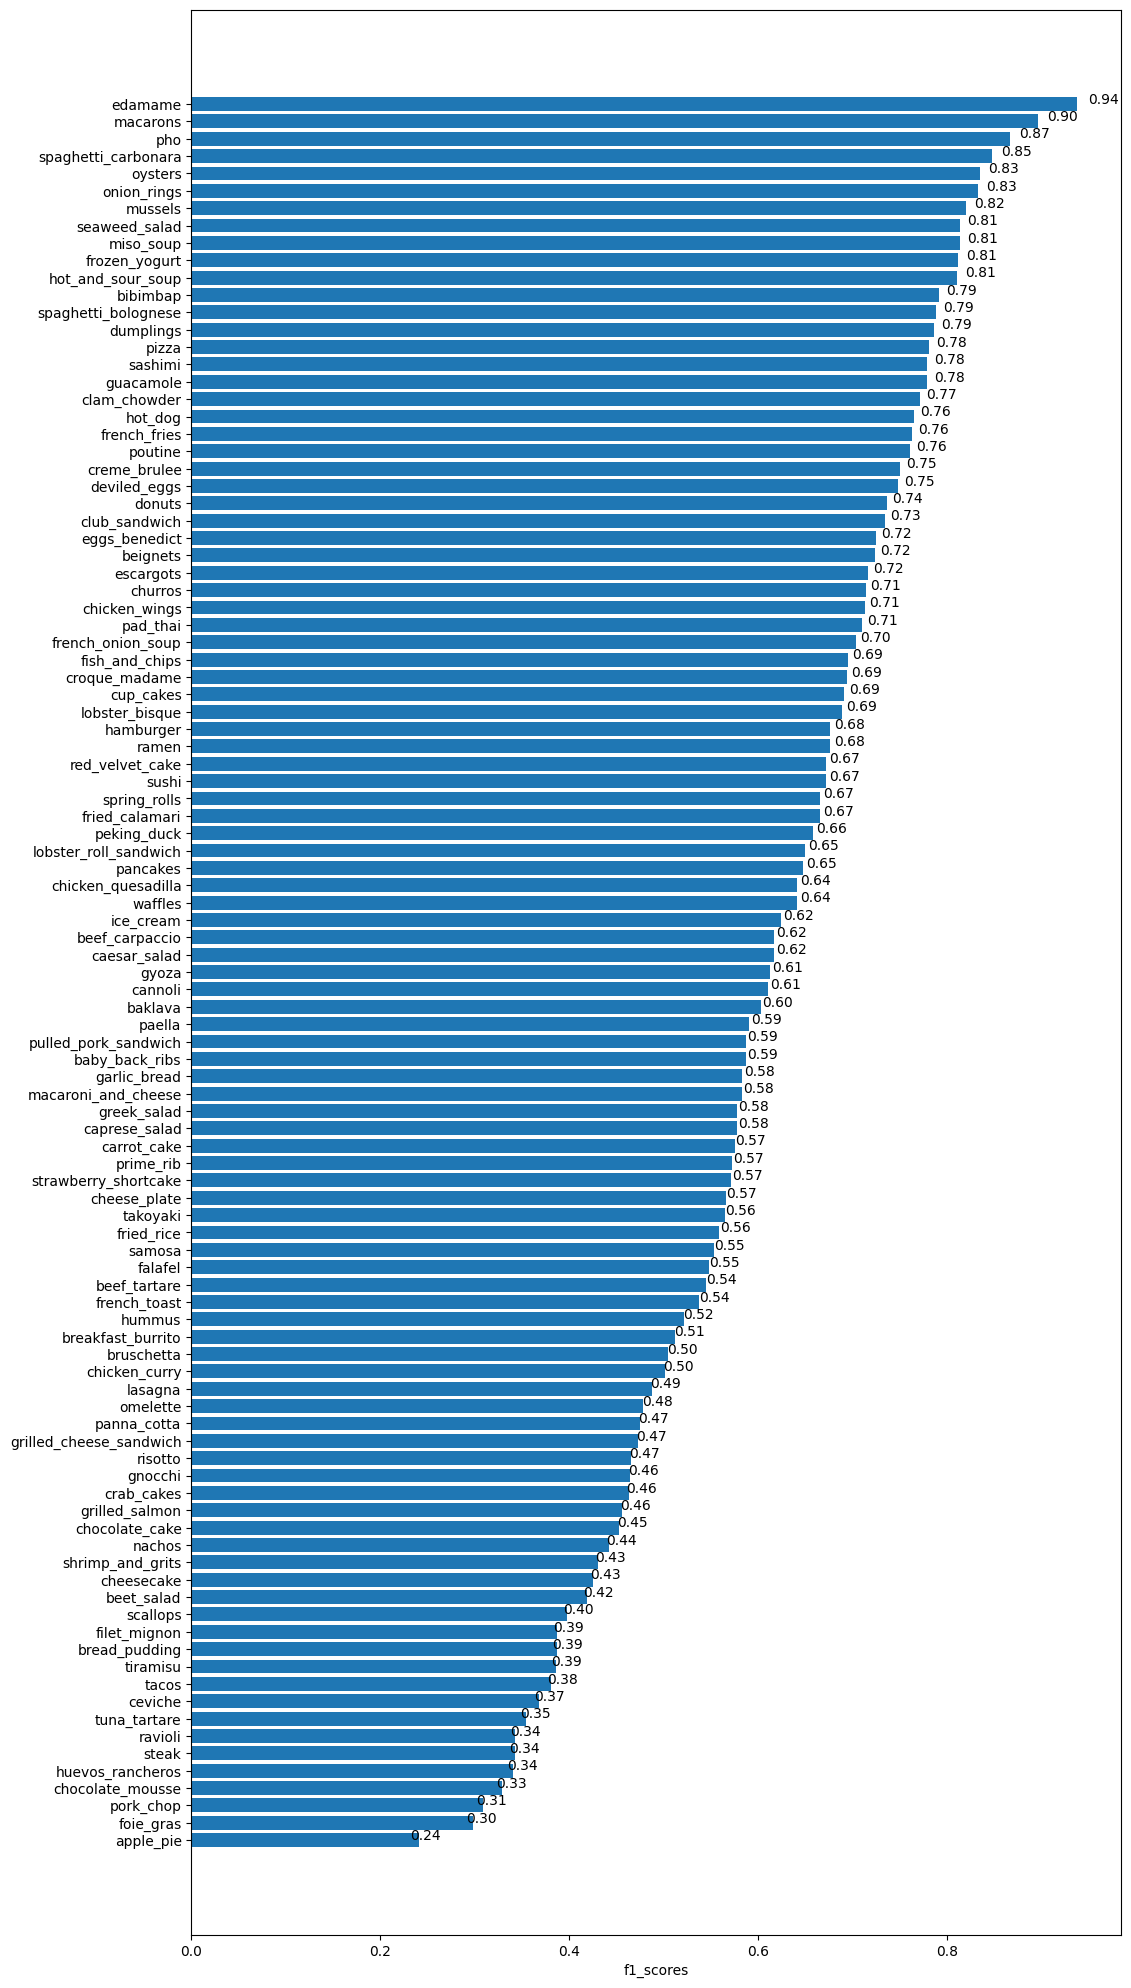

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_score_df)), f1_score_df['f1-score'].values)
ax.set_yticks(range(len(f1_score_df)))
ax.set_yticklabels(f1_score_df['class_name'])
ax.set_xlabel('f1_scores')

# Let's make high on top
ax.invert_yaxis()

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)


## Create function that preperaing or test images or custom images for predictions

In [27]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

## Making Predictions on our test random images

1/1 [==============================] - 0s 29ms/step


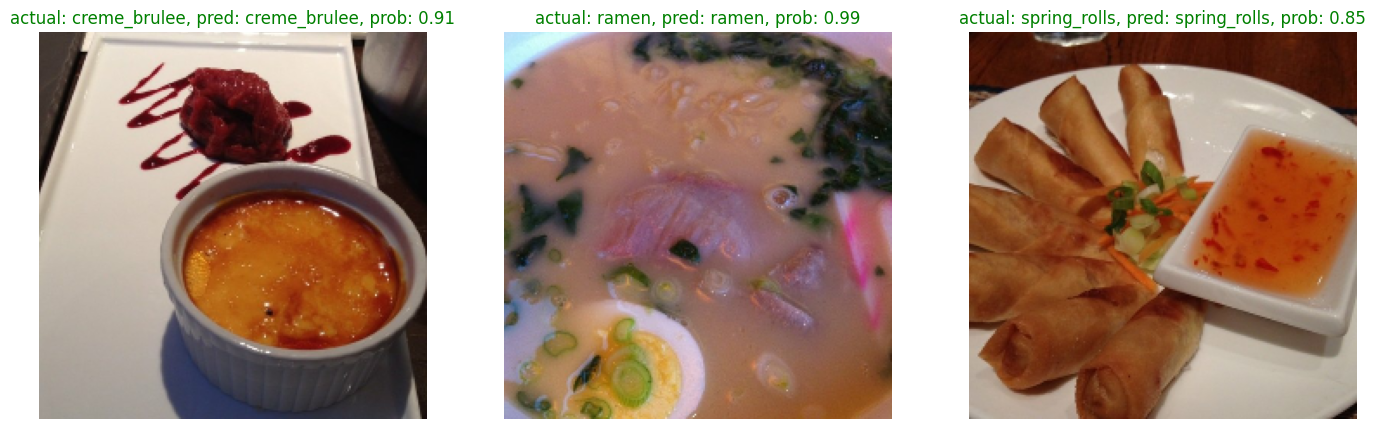

In [57]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

## Finding Most Wrong Predictions

In [33]:
# 1. Get all imgs file path

filepaths = []
for filepath in test_data.list_files('/content/101_food_classes_10_percent/test/*/*.jpg') :
  filepaths.append(filepath.numpy()) # Numpy converted to it because shape of file path was in tensor

# Show at least 10 of them
filepaths[:10]

[b'/content/101_food_classes_10_percent/test/tiramisu/833903.jpg',
 b'/content/101_food_classes_10_percent/test/hot_and_sour_soup/1544940.jpg',
 b'/content/101_food_classes_10_percent/test/tacos/796326.jpg',
 b'/content/101_food_classes_10_percent/test/hot_dog/133012.jpg',
 b'/content/101_food_classes_10_percent/test/bibimbap/3512430.jpg',
 b'/content/101_food_classes_10_percent/test/bruschetta/1236895.jpg',
 b'/content/101_food_classes_10_percent/test/spaghetti_carbonara/1804630.jpg',
 b'/content/101_food_classes_10_percent/test/caprese_salad/3450574.jpg',
 b'/content/101_food_classes_10_percent/test/seaweed_salad/620574.jpg',
 b'/content/101_food_classes_10_percent/test/panna_cotta/3399040.jpg']

In [60]:
# 2. Crate DataFrame with nedded data
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": preds_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'/content/101_food_classes_10_percent/test/ti...,0,52,0.847419,apple_pie,gyoza
1,b'/content/101_food_classes_10_percent/test/ho...,0,0,0.964017,apple_pie,apple_pie
2,b'/content/101_food_classes_10_percent/test/ta...,0,0,0.959259,apple_pie,apple_pie
3,b'/content/101_food_classes_10_percent/test/ho...,0,80,0.658606,apple_pie,pulled_pork_sandwich
4,b'/content/101_food_classes_10_percent/test/bi...,0,79,0.367900,apple_pie,prime_rib


In [61]:
# 3. Find Most predictions
filt =(pred_df['y_true'] == pred_df['y_pred'])

# Let's make a new col with output
pred_df['pred_correct'] = filt

# Show First 10
pred_df.head(10)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'/content/101_food_classes_10_percent/test/ti...,0,52,0.847419,apple_pie,gyoza,False
1,b'/content/101_food_classes_10_percent/test/ho...,0,0,0.964017,apple_pie,apple_pie,True
2,b'/content/101_food_classes_10_percent/test/ta...,0,0,0.959259,apple_pie,apple_pie,True
3,b'/content/101_food_classes_10_percent/test/ho...,0,80,0.658606,apple_pie,pulled_pork_sandwich,False
4,b'/content/101_food_classes_10_percent/test/bi...,0,79,0.367900,apple_pie,prime_rib,False
5,b'/content/101_food_classes_10_percent/test/br...,0,61,0.456755,apple_pie,lobster_roll_sandwich,False
6,b'/content/101_food_classes_10_percent/test/sp...,0,29,0.611244,apple_pie,cup_cakes,False
7,b'/content/101_food_classes_10_percent/test/ca...,0,0,0.473132,apple_pie,apple_pie,True
8,b'/content/101_food_classes_10_percent/test/se...,0,85,0.245397,apple_pie,samosa,False
9,b'/content/101_food_classes_10_percent/test/pa...,0,0,0.724389,apple_pie,apple_pie,True


In [63]:
# 4.  Now Let's sort dataframe on False as First
filt = (pred_df['pred_correct'] == False)
wrong_classes = pred_df[filt]
# wrong_classes

# Sorting with pred_confidential as high on top
wrong_classes = pred_df[filt].sort_values(['pred_conf'], ascending = False)

# Let's get top 100
top_100_wrong = wrong_classes[:100]

top_100_wrong.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
21810,b'/content/101_food_classes_10_percent/test/su...,87,29,0.999997,scallops,cup_cakes,False
231,b'/content/101_food_classes_10_percent/test/ma...,0,100,0.999995,apple_pie,waffles,False
15359,b'/content/101_food_classes_10_percent/test/cr...,61,53,0.999988,lobster_roll_sandwich,hamburger,False
23539,b'/content/101_food_classes_10_percent/test/sa...,94,83,0.999987,strawberry_shortcake,red_velvet_cake,False
21400,b'/content/101_food_classes_10_percent/test/ti...,85,92,0.999981,samosa,spring_rolls,False


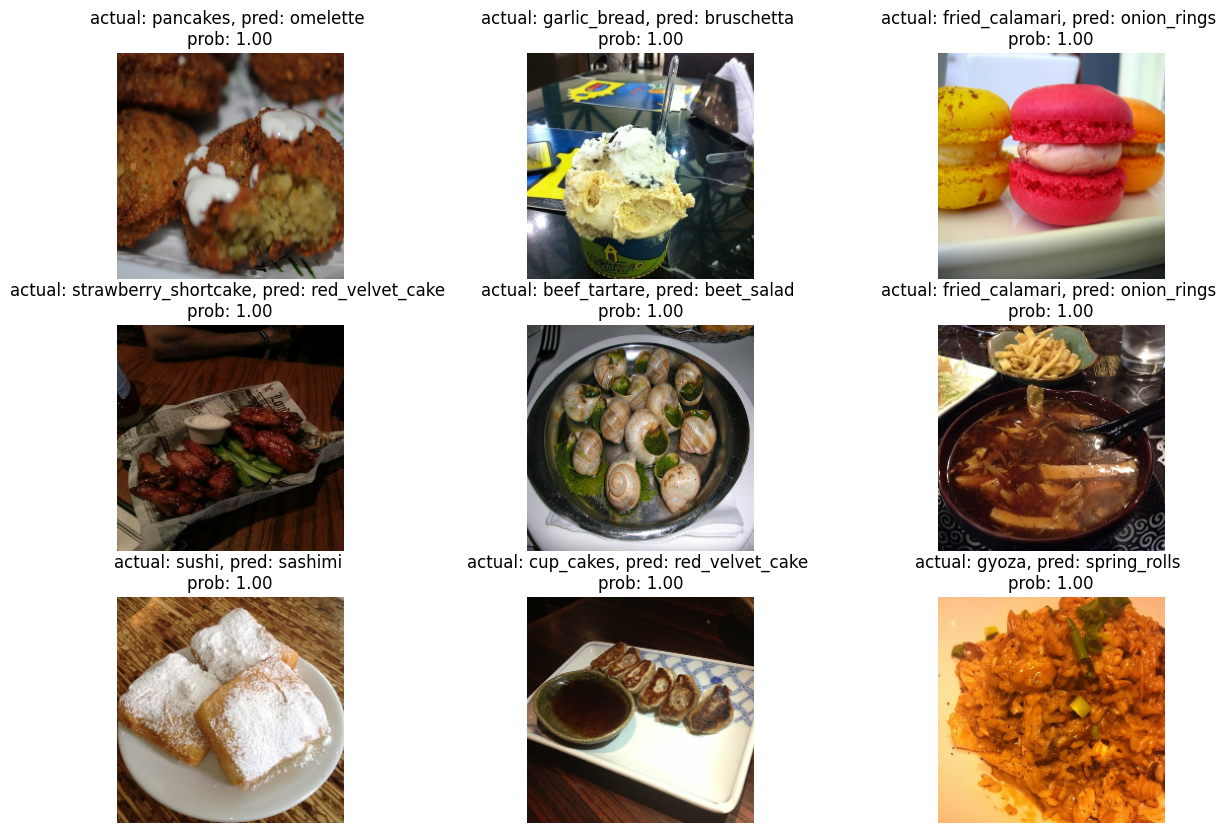

In [64]:
# # 5. Let's visualize top wrongs to see how solve that

# import matplotlib.pyplot as plt

# number_imgs_view = 9
# start_index = 20


# # Open Figure
# plt.figure(figsize=(15, 10))

# # Loop throuhg top_100_wrong
# for i, raw in enumerate(top_100_wrong[start_index: start_index+number_imgs_view].itertuples()):

#   # Plot subplots
#   plt.subplot(3, 3, i+1)
#   # print(raw)
#   img = load_and_prep_image(raw[1]) # raw[1] because it's the img path
#   _, _, _,_, pred_confidence, y_true_classname, y_pred_classname, _ = raw # acces on nedded only

#   # Plot images
#   plt.imshow(img)
#   plt.axis(False)
#   plt.title(f'actual:{y_true_classname}, pred:{y_pred_classname}, \n prob:{pred_confidence}')

# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)